# Develop Linear and Non-Linear (polynomial with degree n) regression models for predicting cases and deaths in US

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import plotly.express as px
import plotly.graph_objects as go

### Start from 2020.06.01 (Monday) to 2021.01.03 (Sunday) of infections in US. X-Axis - number of days, Y-Axis - number of new cases and deaths

In [2]:
cases = pd.read_csv('covid_confirmed_usafacts.csv')
cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


In [3]:
selected_date_columns = [col for col in cases.columns if '2020-06-01' <= col <= '2021-01-03']
cases = cases[selected_date_columns].diff(axis=1).dropna(axis=1)
cases.head()

,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,...,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,2,7,11,6,7,10,13,17,...,48,9,30,36,40,59,26,49,29,37
2,0,0,1,3,8,9,7,5,6,12,...,145,42,117,137,210,220,209,222,132,109
3,3,2,0,6,7,3,4,2,9,6,...,6,2,8,11,45,30,22,3,11,2
4,0,0,0,0,1,0,2,6,4,4,...,14,14,7,16,30,25,17,20,9,19


In [4]:
deaths = pd.read_csv('covid_deaths_usafacts.csv')
deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


In [5]:
selected_date_columns = [col for col in deaths.columns if '2020-06-01' <= col <= '2021-01-03']
deaths= deaths[selected_date_columns].diff(axis=1).dropna(axis=1)
deaths.head()

,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,...,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,2,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,4,4,1,8,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0


In [6]:
daily_cases = []
for col in cases.columns:
    daily_cases.append(cases[col].sum())
daily_cases_data = pd.Series(daily_cases)
daily_cases_data

0       21795
1       21372
2       21923
3       28884
4       23787
        ...  
211    282351
212    236987
213    165207
214    232897
215    226866
Length: 216, dtype: int64

In [7]:
daily_deaths = []
for col in deaths.columns:
    daily_deaths.append(deaths[col].sum())
daily_deaths_data = pd.Series(daily_deaths)
daily_deaths_data


0      1222
1       988
2       972
3      1095
4       781
       ... 
211    3547
212    3600
213    2684
214    3452
215    2345
Length: 216, dtype: int64

In [8]:
days = np.arange(len(daily_cases_data))

lr_cases = LinearRegression()
lr_cases.fit(days.reshape(-1, 1), daily_cases_data)
cases_linear_predictions = lr_cases.predict(days.reshape(-1, 1))

lr_deaths = LinearRegression()
lr_deaths.fit(days.reshape(-1, 1), daily_deaths_data)
deaths_linear_predictions = lr_deaths.predict(days.reshape(-1, 1))

degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(days.reshape(-1, 1))

pr_cases = LinearRegression()
pr_cases.fit(X_poly, daily_cases_data)
cases_poly_predictions = pr_cases.predict(X_poly)

pr_deaths = LinearRegression()
pr_deaths.fit(X_poly, daily_deaths_data)
deaths_poly_predictions = pr_deaths.predict(X_poly)

df = pd.DataFrame({'Days': days,
                   'Actual Cases': daily_cases_data,
                   'Cases Linear Predictions': cases_linear_predictions,
                   f'Cases Polynomial (Degree {degree}) Predictions': cases_poly_predictions,
                   'Actual Deaths': daily_deaths_data,
                   'Deaths Linear Predictions': deaths_linear_predictions,
                   f'Deaths Polynomial (Degree {degree}) Predictions': deaths_poly_predictions})

fig_cases = px.line(df, x='Days', y=['Actual Cases', 'Cases Linear Predictions',
                                    f'Cases Polynomial (Degree {degree}) Predictions'],
                    labels={'value': 'Number of Cases'}, title='Cases Linear vs. Polynomial Regression')
fig_cases.update_layout(width=1000, height=500)
fig_deaths = px.line(df, x='Days', y=['Actual Deaths', 'Deaths Linear Predictions',
                                      f'Deaths Polynomial (Degree {degree}) Predictions'],
                     labels={'value': 'Number of Deaths'}, title='Deaths Linear vs. Polynomial Regression')
fig_deaths.update_layout(width=1000, height=500)

fig_cases.write_image("fig_cases.png")
fig_deaths.write_image("fig_deaths.png")

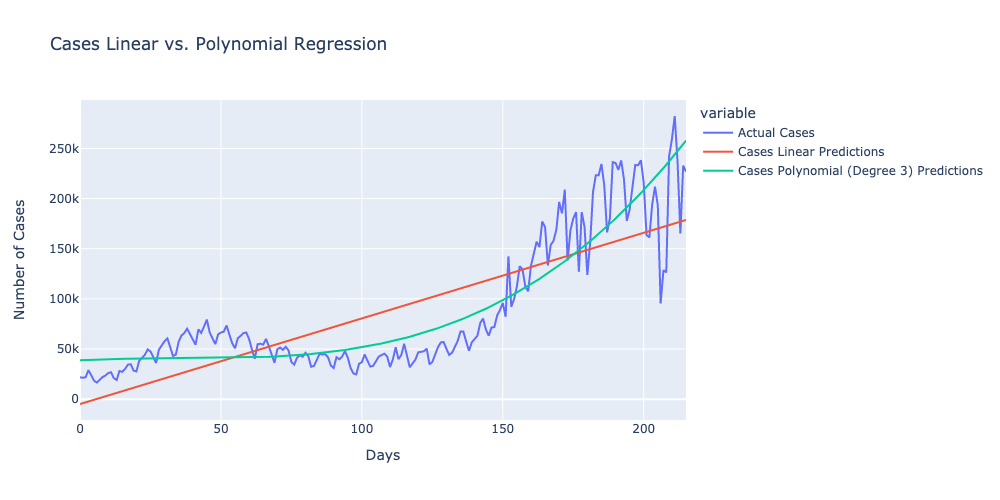

In [9]:
Image(filename="fig_cases.png")

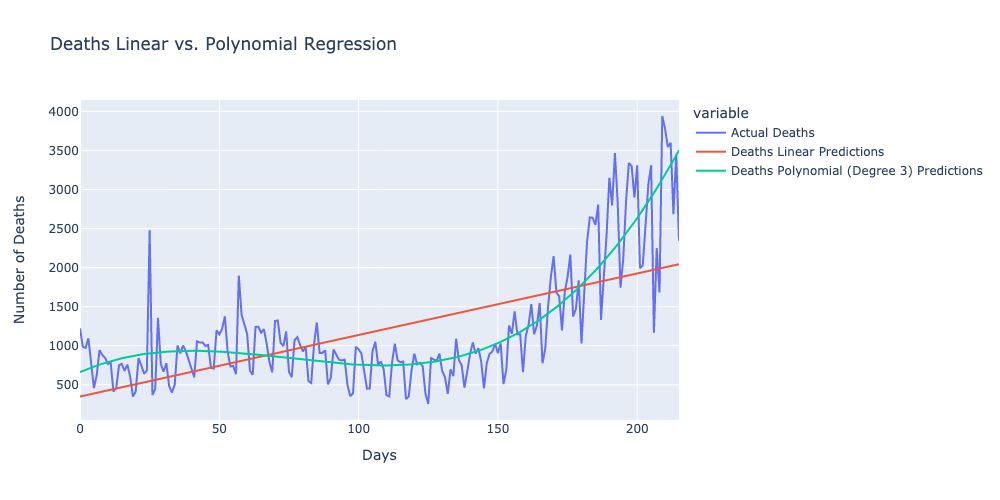

In [10]:
Image(filename="fig_deaths.png")

### Calculate Root Mean Square Error (RMSE) for each model


In [11]:
rmse_linear_cases = np.sqrt(mean_squared_error(daily_cases_data, cases_linear_predictions))
rmse_linear_deaths = np.sqrt(mean_squared_error(daily_deaths_data, deaths_linear_predictions))
rmse_poly_cases = np.sqrt(mean_squared_error(daily_cases_data, cases_poly_predictions))
rmse_poly_deaths = np.sqrt(mean_squared_error(daily_deaths_data, deaths_poly_predictions))

print(f'RMSE for Cases (Linear): {rmse_linear_cases:.2f}')
print(f'RMSE for Deaths (Linear): {rmse_linear_deaths:.2f}\n')
print(f'RMSE for Cases (Polynomial Degree {degree}): {rmse_poly_cases:.2f}')
print(f'RMSE for Deaths (Polynomial Degree {degree}): {rmse_poly_deaths:.2f}')

RMSE for Cases (Linear): 40066.91
RMSE for Deaths (Linear): 611.96

RMSE for Cases (Polynomial Degree 3): 27980.45
RMSE for Deaths (Polynomial Degree 3): 403.92


In [12]:
deaths = pd.read_csv('covid_deaths_usafacts.csv')
cases = pd.read_csv('covid_confirmed_usafacts.csv')

selected_date_columns = [col for col in cases.columns if '2020-06-01' <= col <= '2021-01-10']
cases = cases[selected_date_columns].diff(axis=1).dropna(axis=1)
deaths= deaths[selected_date_columns].diff(axis=1).dropna(axis=1)


daily_deaths = []
for col in deaths.columns:
    daily_deaths.append(deaths[col].sum())
daily_deaths_data = pd.Series(daily_deaths)
daily_deaths_data

daily_cases = []
for col in cases.columns:
    daily_cases.append(cases[col].sum())
daily_cases_data = pd.Series(daily_cases)
daily_cases_data

days = np.arange(len(daily_cases_data))
print(len(days))

cases_linear_predictions = lr_cases.predict(days.reshape(-1, 1))
deaths_linear_predictions = lr_deaths.predict(days.reshape(-1, 1))

degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(days.reshape(-1, 1))

cases_poly_predictions = pr_cases.predict(X_poly)

deaths_poly_predictions = pr_deaths.predict(X_poly)

df = pd.DataFrame({'Days': days,
                   'Actual Cases': daily_cases_data,
                   'Cases Linear Predictions': cases_linear_predictions,
                   f'Cases Polynomial (Degree {degree}) Predictions': cases_poly_predictions,
                   'Actual Deaths': daily_deaths_data,
                   'Deaths Linear Predictions': deaths_linear_predictions,
                   f'Deaths Polynomial (Degree {degree}) Predictions': deaths_poly_predictions})

fig_cases = px.line(df, x='Days', y=['Actual Cases', 'Cases Linear Predictions',
                                    f'Cases Polynomial (Degree {degree}) Predictions'],
                    labels={'value': 'Number of Cases'}, title='Cases Linear vs. Polynomial Regression')
fig_cases.update_layout(width=1000, height=500)
fig_deaths = px.line(df, x='Days', y=['Actual Deaths', 'Deaths Linear Predictions',
                                      f'Deaths Polynomial (Degree {degree}) Predictions'],
                     labels={'value': 'Number of Deaths'}, title='Deaths Linear vs. Polynomial Regression')
fig_deaths.update_layout(width=1000, height=500)

fig_deaths.add_shape(dict(type='line', x0=216, x1=216, y0=0, y1=4500, line=dict(color='red', width=1, dash='dash')))
fig_cases.add_shape(dict(type='line', x0=216, x1=216, y0=0, y1=320000, line=dict(color='red', width=1, dash='dash')))
fig_deaths.add_trace(go.Scatter(x=[216, 216], y=[0, 10], mode='lines', name='Training cutoff', line=dict(color='red', width=1, dash='dash')))
fig_cases.add_trace(go.Scatter(x=[216, 216], y=[0, 10], mode='lines', name='Training cutoff', line=dict(color='red', width=1, dash='dash')))

fig_cases.write_image("fig_cases_prediction.png")
fig_deaths.write_image("fig_deaths_prediction.png")

223


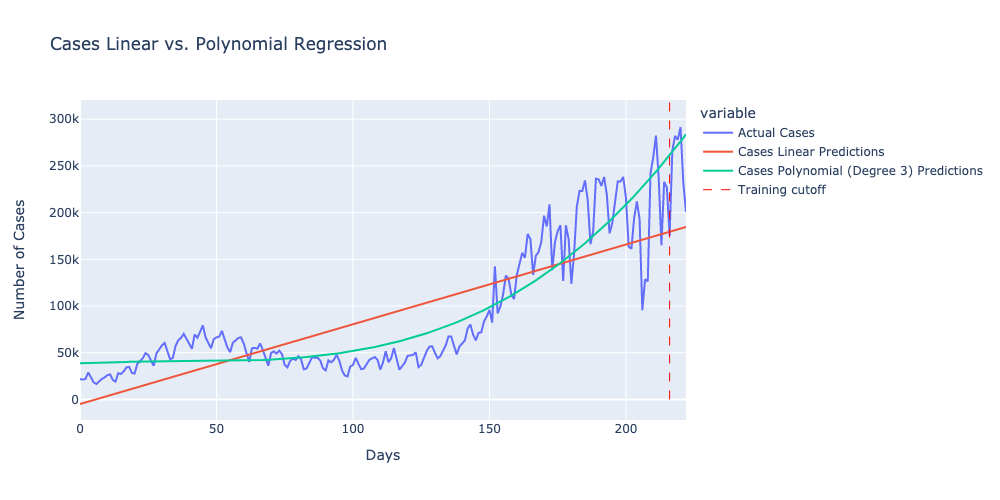

In [13]:
Image(filename="fig_cases_prediction.png")

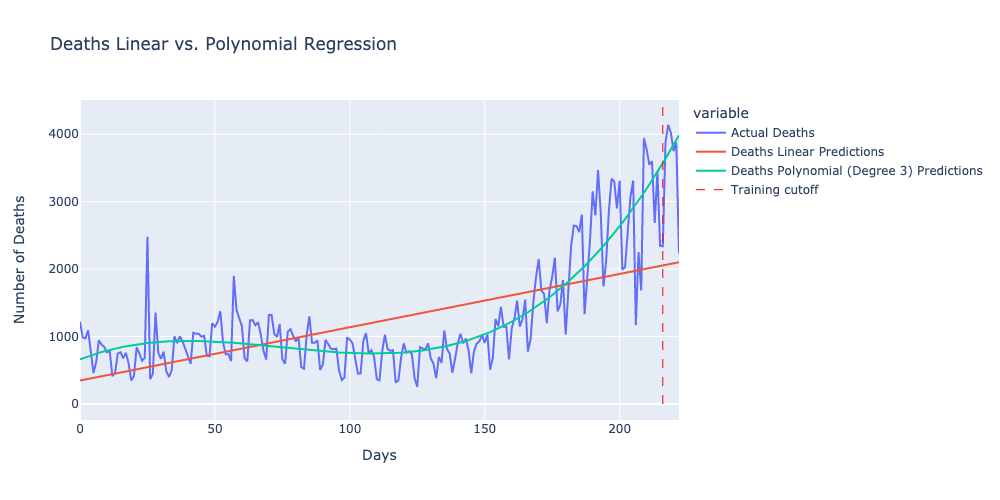

In [14]:
Image(filename="fig_deaths_prediction.png")

### Discuss bias versus variance tradeoff. (5 points)

The bias-variance tradeoff is a fundamental concept in machine learning that involves balancing the error due to bias and the error due to variance. 

RMSE for Cases (Linear): 40066.91
* The high RMSE for the linear model suggests that the model has high bias. This means that the model is not capturing the underlying patterns in the data well. It is oversimplified and is not flexible enough to represent the complexity of the relationship between the features and the target variable (cases).

RMSE for Deaths (Linear): 611.96
* Similarly, the high RMSE for the linear model for deaths indicates high bias. The model is too simplistic and fails to capture the underlying patterns in the data.

RMSE for Cases (Polynomial Degree 3): 27980.45
* The lower RMSE for the polynomial model of degree 3 suggests that this model has lower bias compared to the linear model for cases. It captures more of the underlying patterns in the data due to its increased flexibility.
RMSE for Deaths (Polynomial Degree 3): 403.92
* Similarly, the lower RMSE for the polynomial model of degree 3 for deaths indicates lower bias compared to the linear model. This polynomial model captures more of the underlying patterns in the data for deaths.
In summary, the tradeoff here is between bias and variance. The linear models have high bias and low variance, leading to underfitting. On the other hand, the polynomial models of degree 3 have lower bias and higher variance, potentially capturing more of the underlying patterns in the data. 
There is a risk of overfitting with the polynomial models if the degree is increased too much, leading to high variance and poor generalization to unseen data. 

In [16]:
Worldcoviddata=pd.read_csv("owid-covid-data.csv")
#Worldcoviddata.columns
grouped_df = Worldcoviddata.groupby('iso_code')['population'].sum().reset_index()
grouped_df

/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_25493/734520540.py:1: DtypeWarning:

Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.



,iso_code,population
0,ABW,1.592627e+08
1,AFG,6.136413e+10
2,AGO,5.309878e+10
3,AIA,2.368848e+07
4,ALB,4.240738e+09
...,...,...
250,WSM,3.318059e+08
251,YEM,5.027535e+10
252,ZAF,8.936167e+10
253,ZMB,2.986636e+10


In [17]:
sorted_df = grouped_df.sort_values(by='population', ascending=False)

In [18]:
Worldcoviddata_filtered=Worldcoviddata.loc[(Worldcoviddata['iso_code']=='IND')|(Worldcoviddata['iso_code']=='CHN')|
        (Worldcoviddata['iso_code']=='AFG')|(Worldcoviddata['iso_code']=='PAK')|(Worldcoviddata['iso_code']=='AUS')]
Worldcoviddata_filtered

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255181,PAK,Asia,Pakistan,2024-01-31,1580631.0,0.0,0.0,30656.0,0.0,0.0,...,36.7,59.607,0.6,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
255182,PAK,Asia,Pakistan,2024-02-01,1580631.0,0.0,0.0,30656.0,0.0,0.0,...,36.7,59.607,0.6,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
255183,PAK,Asia,Pakistan,2024-02-02,1580631.0,0.0,0.0,30656.0,0.0,0.0,...,36.7,59.607,0.6,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN
255184,PAK,Asia,Pakistan,2024-02-03,1580631.0,0.0,0.0,30656.0,0.0,0.0,...,36.7,59.607,0.6,67.27,0.557,235824864.0,NaN,NaN,NaN,NaN


In [19]:
# Convert the 'date' column to Timestamp type
Worldcoviddata_filtered['date'] = pd.to_datetime(Worldcoviddata_filtered['date'])
start_date = pd.to_datetime('2020-06-01')
end_date = pd.to_datetime('2021-01-03')
Worldcoviddata_filtered = Worldcoviddata_filtered[(Worldcoviddata_filtered['date'] >= start_date) & (Worldcoviddata_filtered['date'] <= end_date)]

print(Worldcoviddata_filtered)



       iso_code continent     location       date  total_cases  new_cases  \
148         AFG      Asia  Afghanistan 2020-06-01      14443.0        0.0   
149         AFG      Asia  Afghanistan 2020-06-02      14443.0        0.0   
150         AFG      Asia  Afghanistan 2020-06-03      14443.0        0.0   
151         AFG      Asia  Afghanistan 2020-06-04      14443.0        0.0   
152         AFG      Asia  Afghanistan 2020-06-05      14443.0        0.0   
...         ...       ...          ...        ...          ...        ...   
254054      PAK      Asia     Pakistan 2020-12-30     469482.0        0.0   
254055      PAK      Asia     Pakistan 2020-12-31     469482.0        0.0   
254056      PAK      Asia     Pakistan 2021-01-01     469482.0        0.0   
254057      PAK      Asia     Pakistan 2021-01-02     469482.0        0.0   
254058      PAK      Asia     Pakistan 2021-01-03     484362.0    14880.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  

/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_25493/1442087432.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
# Creating separate dataframes for each individual country.
Indiacoviddata= Worldcoviddata_filtered.loc[Worldcoviddata_filtered['iso_code']=='IND']
Chinacoviddata= Worldcoviddata_filtered.loc[Worldcoviddata_filtered['iso_code']=='CHN']
Afganistancoviddata=Worldcoviddata_filtered.loc[Worldcoviddata_filtered['iso_code']=='AFG']
Pakisthancoviddata=Worldcoviddata_filtered.loc[Worldcoviddata_filtered['iso_code']=='PAK']
Australiacoviddata=Worldcoviddata_filtered.loc[Worldcoviddata_filtered['iso_code']=='AUS']

In [22]:
Indiacoviddata['date'] = pd.to_datetime(Indiacoviddata['date'])
Chinacoviddata['date'] = pd.to_datetime(Chinacoviddata['date'])
Afganistancoviddata['date'] = pd.to_datetime(Afganistancoviddata['date'])
Pakisthancoviddata['date'] = pd.to_datetime(Pakisthancoviddata['date'])
Australiacoviddata['date'] = pd.to_datetime(Australiacoviddata['date'])

/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_25493/1291960818.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_25493/1291960818.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_25493/1291960818.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

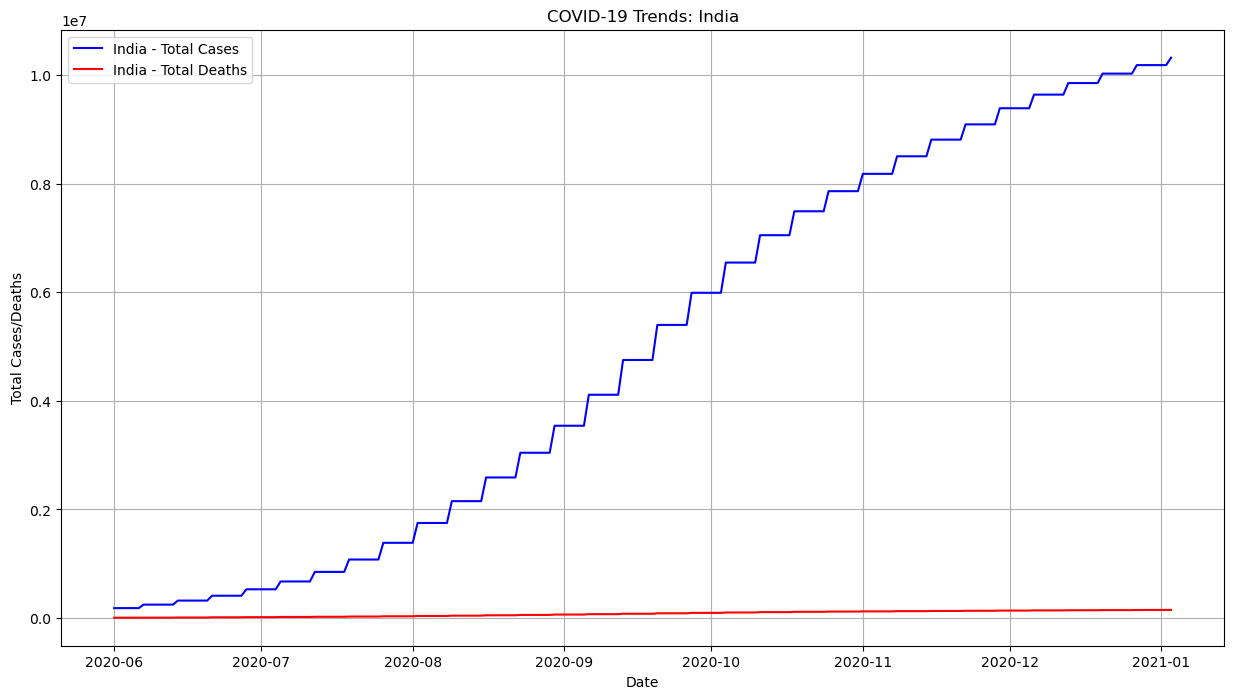

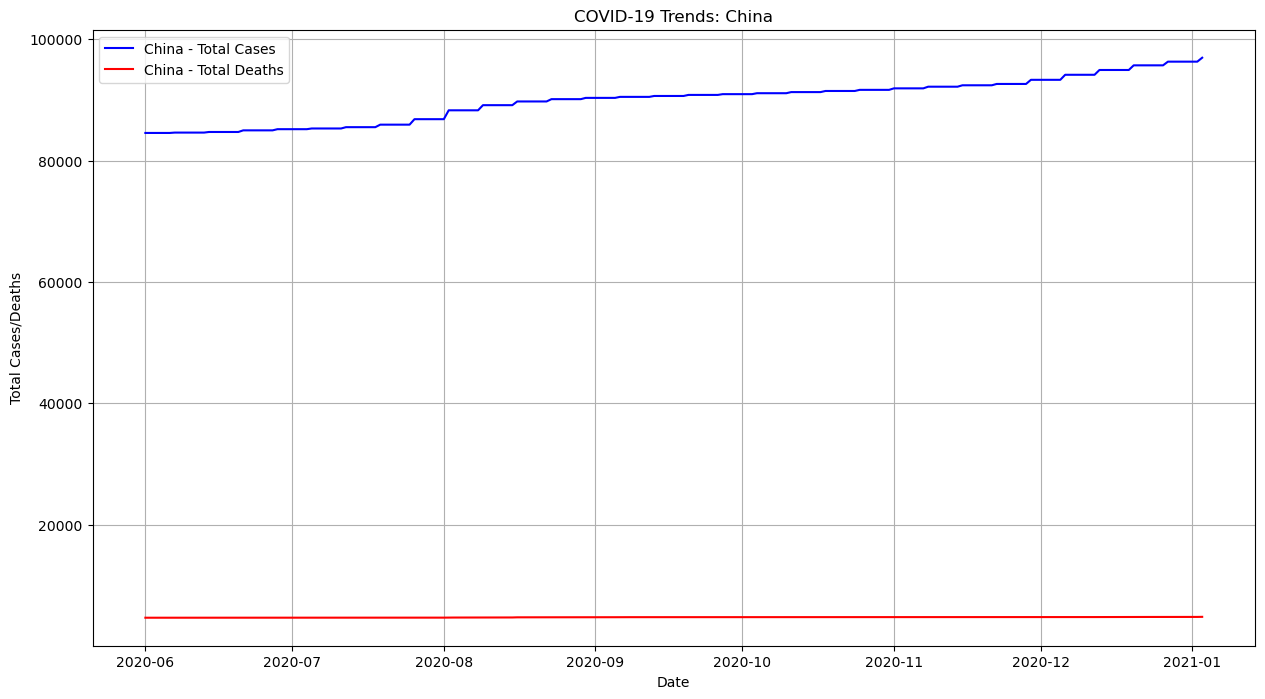

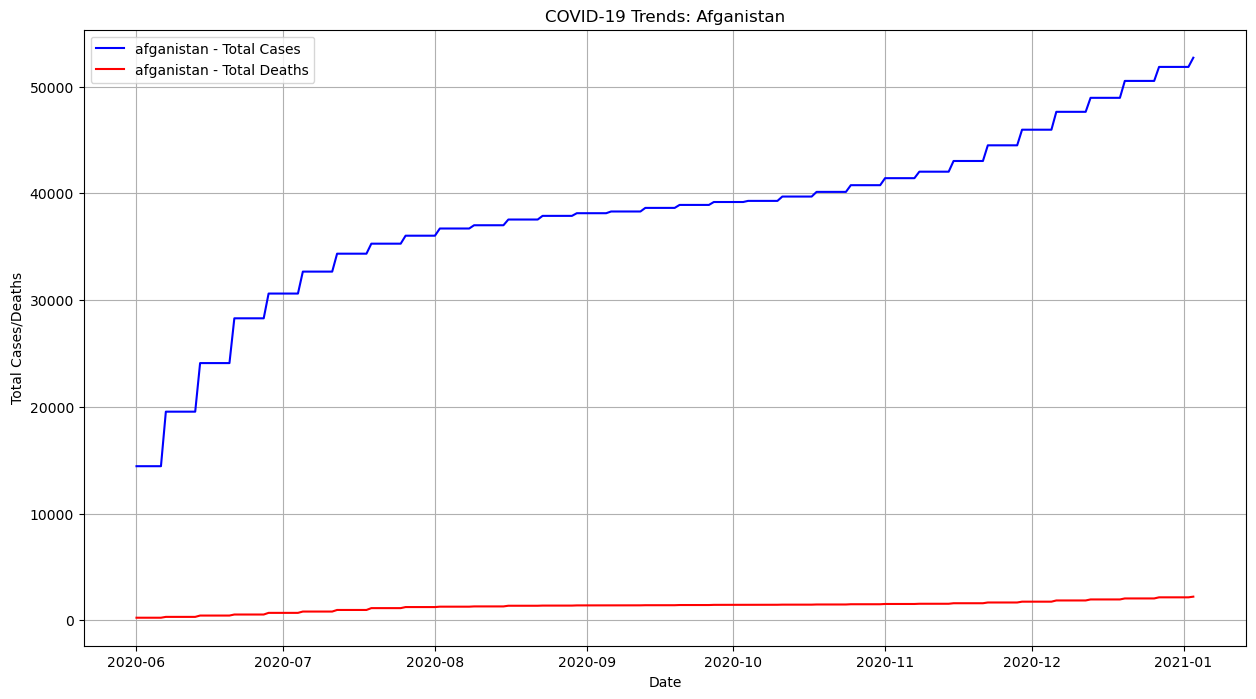

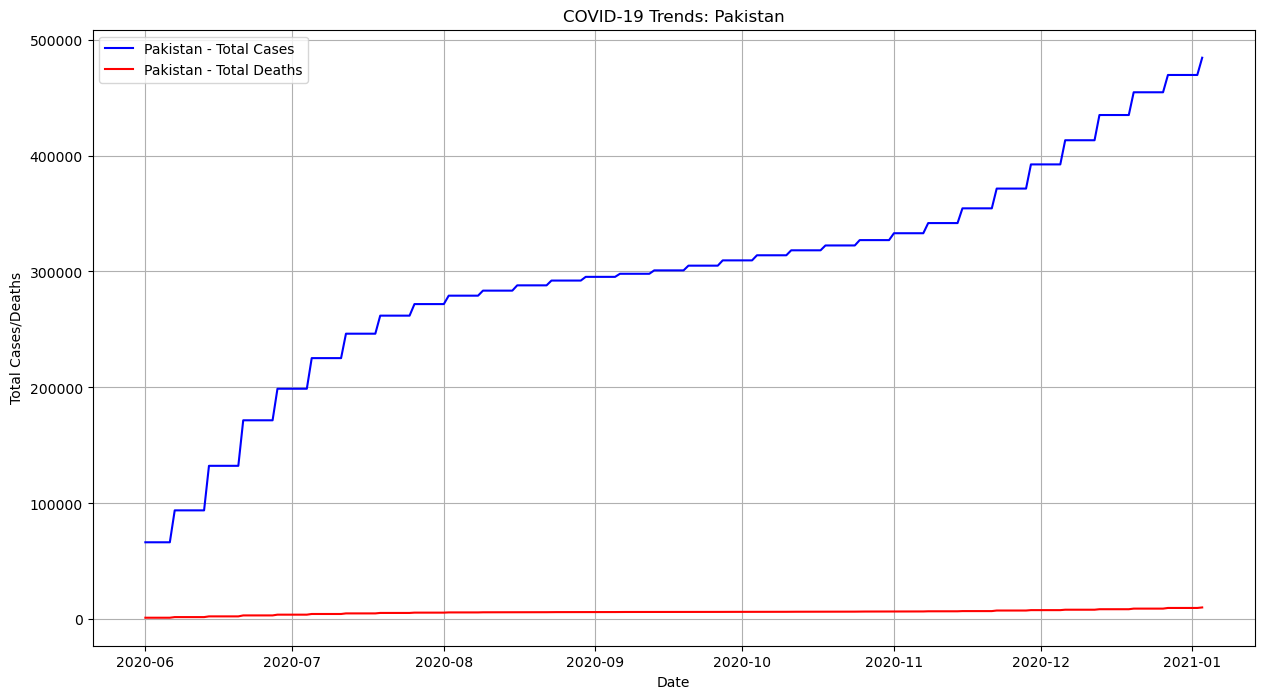

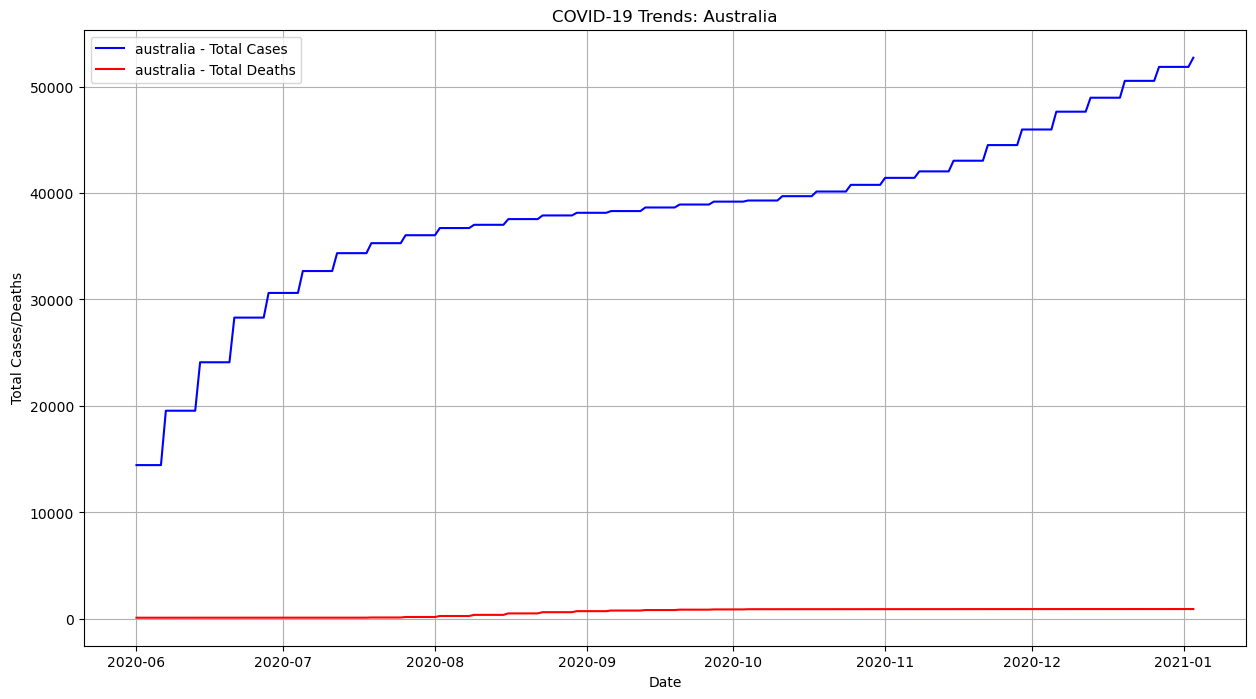

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
india_data = Indiacoviddata.set_index('date')
china_data = Chinacoviddata.set_index('date')
afganistan_data = Afganistancoviddata.set_index('date')
pakistan_data = Pakisthancoviddata.set_index('date')
australia_data = Australiacoviddata.set_index('date')

# for India
plt.figure(figsize=(15, 8))
plt.plot(india_data.index, india_data['total_cases'], label='India - Total Cases', color='blue')
plt.plot(india_data.index, india_data['total_deaths'], label='India - Total Deaths', color='red')
plt.title('COVID-19 Trends: India')
plt.xlabel('Date')
plt.ylabel('Total Cases/Deaths')
plt.grid(True)
plt.legend()
plt.show()

# for China
plt.figure(figsize=(15, 8))
plt.plot(china_data.index, china_data['total_cases'], label='China - Total Cases', color='blue')
plt.plot(china_data.index, china_data['total_deaths'], label='China - Total Deaths', color='red')
plt.title('COVID-19 Trends: China')
plt.xlabel('Date')
plt.ylabel('Total Cases/Deaths')
plt.grid(True)
plt.legend()
plt.show()

#  for afganistan
plt.figure(figsize=(15, 8))
plt.plot(afganistan_data.index,afganistan_data['total_cases'], label='afganistan - Total Cases', color='blue')
plt.plot(afganistan_data.index, afganistan_data['total_deaths'], label='afganistan - Total Deaths', color='red')
plt.title('COVID-19 Trends: Afganistan')
plt.xlabel('Date')
plt.ylabel('Total Cases/Deaths')
plt.grid(True)
plt.legend()
plt.show()

# for Pakistan
plt.figure(figsize=(15, 8))
plt.plot(pakistan_data.index, pakistan_data['total_cases'], label='Pakistan - Total Cases',color='blue')
plt.plot(pakistan_data.index, pakistan_data['total_deaths'], label='Pakistan - Total Deaths', color='red')
plt.title('COVID-19 Trends: Pakistan')
plt.xlabel('Date')
plt.ylabel('Total Cases/Deaths')
plt.grid(True)
plt.legend()
plt.show()

#  for Australia
plt.figure(figsize=(15, 8))
plt.plot(afganistan_data.index, afganistan_data['total_cases'], label='australia - Total Cases',color='blue')
plt.plot(afganistan_data.index, australia_data['total_deaths'], label='australia - Total Deaths', color='red')
plt.title('COVID-19 Trends: Australia')
plt.xlabel('Date')
plt.ylabel('Total Cases/Deaths')
plt.grid(True)
plt.legend()
plt.show()


/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_25493/809413141.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_25493/809413141.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_25493/809413141.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

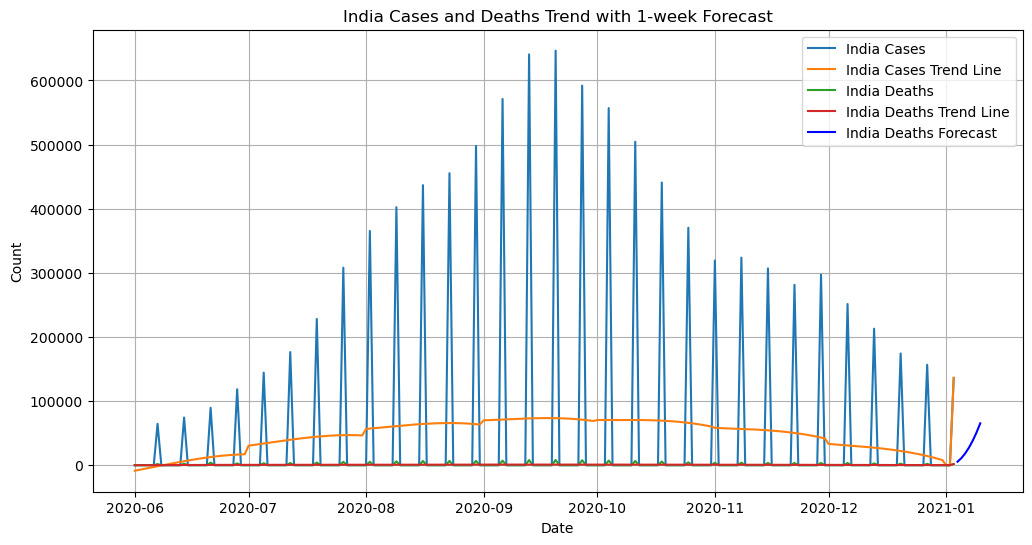

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

india_data = Worldcoviddata_filtered[Worldcoviddata_filtered['iso_code'] == 'IND']
india_data['date'] = pd.to_datetime(india_data['date'])

india_data['Day'] = india_data['date'].dt.day
india_data['Month'] = india_data['date'].dt.month
india_data['Year'] = india_data['date'].dt.year

X_india_cases = india_data[['Day', 'Month', 'Year']]
y_india_cases = india_data['new_cases']

poly_features_india_cases = PolynomialFeatures(degree=3)
X_poly_india_cases = poly_features_india_cases.fit_transform(X_india_cases)
poly_model_india_cases = LinearRegression().fit(X_poly_india_cases, y_india_cases)

X_india_deaths = india_data[['Day', 'Month', 'Year']]
y_india_deaths = india_data['new_deaths']

poly_features_india_deaths = PolynomialFeatures(degree=3)
X_poly_india_deaths = poly_features_india_deaths.fit_transform(X_india_deaths)
poly_model_india_deaths = LinearRegression().fit(X_poly_india_deaths, y_india_deaths)

forecast_start_date = pd.to_datetime('2021-01-04')
forecast_end_date = pd.to_datetime('2021-01-10')
forecast_dates_india = pd.date_range(forecast_start_date, forecast_end_date)
forecast_data_india = pd.DataFrame({'Date': forecast_dates_india, 'Day': forecast_dates_india.day, 'Month': forecast_dates_india.month, 'Year': forecast_dates_india.year})
forecast_data_india['Cases_Forecast'] = poly_model_india_cases.predict(poly_features_india_cases.transform(forecast_data_india[['Day', 'Month', 'Year']]))
forecast_data_india['Deaths_Forecast'] = poly_model_india_deaths.predict(poly_features_india_deaths.transform(forecast_data_india[['Day', 'Month', 'Year']]))
plt.figure(figsize=(12, 6))
plt.plot(india_data['date'], india_data['new_cases'], label='India Cases')
plt.plot(india_data['date'], poly_model_india_cases.predict(X_poly_india_cases), label='India Cases Trend Line')
#plt.plot(forecast_data_india['Date'], forecast_data_india['Cases_Forecast'], label='India Cases Forecast', color='red')

plt.plot(india_data['date'], india_data['new_deaths'], label='India Deaths')
plt.plot(india_data['date'], poly_model_india_deaths.predict(X_poly_india_deaths), label='India Deaths Trend Line')
plt.plot(forecast_data_india['Date'], forecast_data_india['Deaths_Forecast'], label='India Deaths Forecast', color='blue')

plt.title('India Cases and Deaths Trend with 1-week Forecast')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_25493/3273813974.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_25493/3273813974.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_25493/3273813974.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

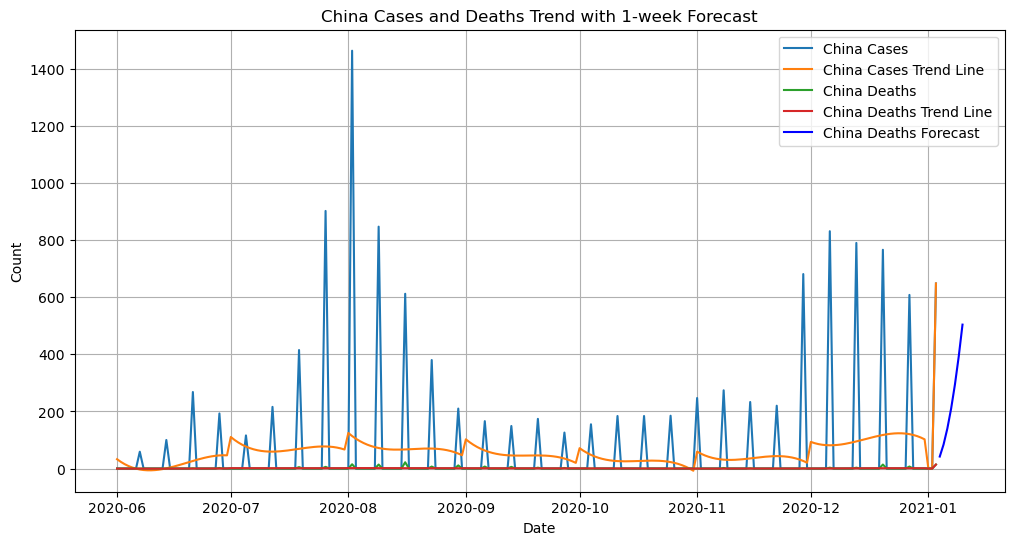

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
china_data = Worldcoviddata_filtered[Worldcoviddata_filtered['iso_code'] == 'CHN']

china_data['date'] = pd.to_datetime(china_data['date'])

china_data['Day'] = china_data['date'].dt.day
china_data['Month'] = china_data['date'].dt.month
china_data['Year'] = china_data['date'].dt.year

X_china_cases = china_data[['Day', 'Month', 'Year']]
y_china_cases = china_data['new_cases']
poly_features_china_cases = PolynomialFeatures(degree=3)
X_poly_china_cases = poly_features_china_cases.fit_transform(X_china_cases)
poly_model_china_cases = LinearRegression().fit(X_poly_china_cases, y_china_cases)

X_china_deaths = china_data[['Day', 'Month', 'Year']]
y_china_deaths = china_data['new_deaths']


poly_features_china_deaths = PolynomialFeatures(degree=3)
X_poly_china_deaths = poly_features_china_deaths.fit_transform(X_china_deaths)
poly_model_china_deaths = LinearRegression().fit(X_poly_china_deaths, y_china_deaths)


forecast_start_date = pd.to_datetime('2021-01-04')
forecast_end_date = pd.to_datetime('2021-01-10')
forecast_dates_china = pd.date_range(forecast_start_date, forecast_end_date)
forecast_data_china = pd.DataFrame({'Date': forecast_dates_china, 'Day': forecast_dates_china.day, 'Month': forecast_dates_china.month, 'Year': forecast_dates_china.year})
forecast_data_china['Cases_Forecast'] = poly_model_china_cases.predict(poly_features_china_cases.transform(forecast_data_china[['Day', 'Month', 'Year']]))
forecast_data_china['Deaths_Forecast'] = poly_model_china_deaths.predict(poly_features_china_deaths.transform(forecast_data_china[['Day', 'Month', 'Year']]))


plt.figure(figsize=(12, 6))
plt.plot(china_data['date'], china_data['new_cases'], label='China Cases')
plt.plot(china_data['date'], poly_model_china_cases.predict(X_poly_china_cases), label='China Cases Trend Line')
#plt.plot(forecast_data_china['Date'], forecast_data_china['Cases_Forecast'], label='China Cases Forecast', color='red')

plt.plot(china_data['date'], china_data['new_deaths'], label='China Deaths')
plt.plot(china_data['date'], poly_model_china_deaths.predict(X_poly_china_deaths), label='China Deaths Trend Line')
plt.plot(forecast_data_china['Date'], forecast_data_china['Deaths_Forecast'], label='China Deaths Forecast', color='blue')

plt.title('China Cases and Deaths Trend with 1-week Forecast')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()



/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_25493/409612280.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_25493/409612280.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_25493/409612280.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

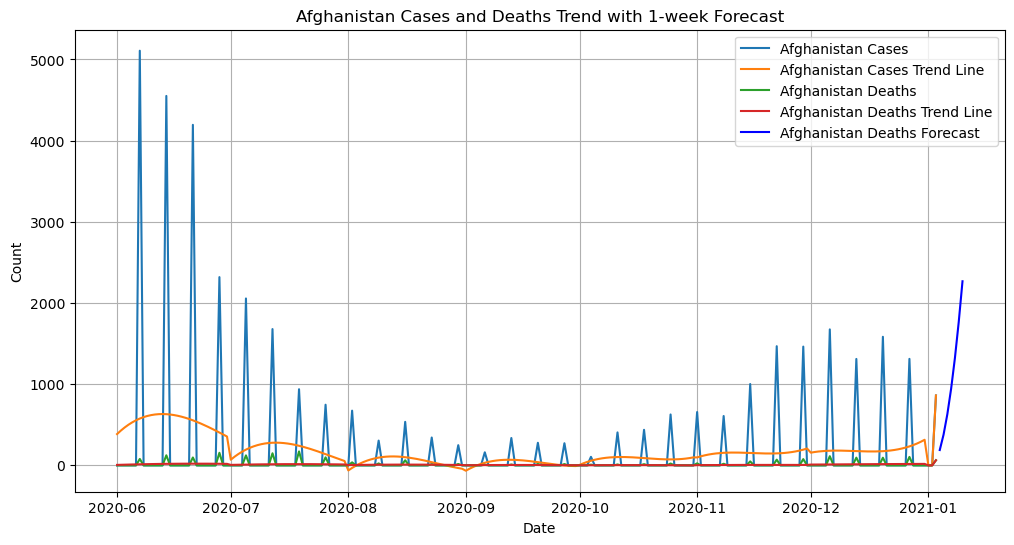

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

afghanistan_data = Worldcoviddata_filtered[Worldcoviddata_filtered['iso_code'] == 'AFG']

afghanistan_data['date'] = pd.to_datetime(afghanistan_data['date'])

afghanistan_data['Day'] = afghanistan_data['date'].dt.day
afghanistan_data['Month'] = afghanistan_data['date'].dt.month
afghanistan_data['Year'] = afghanistan_data['date'].dt.year

X_afghanistan_cases = afghanistan_data[['Day', 'Month', 'Year']]
y_afghanistan_cases = afghanistan_data['new_cases']
poly_features_afghanistan_cases = PolynomialFeatures(degree=3)
X_poly_afghanistan_cases = poly_features_afghanistan_cases.fit_transform(X_afghanistan_cases)
poly_model_afghanistan_cases = LinearRegression().fit(X_poly_afghanistan_cases, y_afghanistan_cases)

X_afghanistan_deaths = afghanistan_data[['Day', 'Month', 'Year']]
y_afghanistan_deaths = afghanistan_data['new_deaths']

poly_features_afghanistan_deaths = PolynomialFeatures(degree=3)
X_poly_afghanistan_deaths = poly_features_afghanistan_deaths.fit_transform(X_afghanistan_deaths)
poly_model_afghanistan_deaths = LinearRegression().fit(X_poly_afghanistan_deaths, y_afghanistan_deaths)

forecast_start_date = pd.to_datetime('2021-01-04')
forecast_end_date = pd.to_datetime('2021-01-10')
forecast_dates_afghanistan = pd.date_range(forecast_start_date, forecast_end_date)
forecast_data_afghanistan = pd.DataFrame({'Date': forecast_dates_afghanistan, 'Day': forecast_dates_afghanistan.day, 'Month': forecast_dates_afghanistan.month, 'Year': forecast_dates_afghanistan.year})
forecast_data_afghanistan['Cases_Forecast'] = poly_model_afghanistan_cases.predict(poly_features_afghanistan_cases.transform(forecast_data_afghanistan[['Day', 'Month', 'Year']]))
forecast_data_afghanistan['Deaths_Forecast'] = poly_model_afghanistan_deaths.predict(poly_features_afghanistan_deaths.transform(forecast_data_afghanistan[['Day', 'Month', 'Year']]))


plt.figure(figsize=(12, 6))
plt.plot(afghanistan_data['date'], afghanistan_data['new_cases'], label='Afghanistan Cases')
plt.plot(afghanistan_data['date'], poly_model_afghanistan_cases.predict(X_poly_afghanistan_cases), label='Afghanistan Cases Trend Line')
#plt.plot(forecast_data_afghanistan['Date'], forecast_data_afghanistan['Cases_Forecast'], label='Afghanistan Cases Forecast', linestyle='--', marker='o', color='red')

plt.plot(afghanistan_data['date'], afghanistan_data['new_deaths'], label='Afghanistan Deaths')
plt.plot(afghanistan_data['date'], poly_model_afghanistan_deaths.predict(X_poly_afghanistan_deaths), label='Afghanistan Deaths Trend Line')
plt.plot(forecast_data_afghanistan['Date'], forecast_data_afghanistan['Deaths_Forecast'], label='Afghanistan Deaths Forecast',color='blue')

plt.title('Afghanistan Cases and Deaths Trend with 1-week Forecast')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_25493/1788867643.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_25493/1788867643.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_25493/1788867643.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

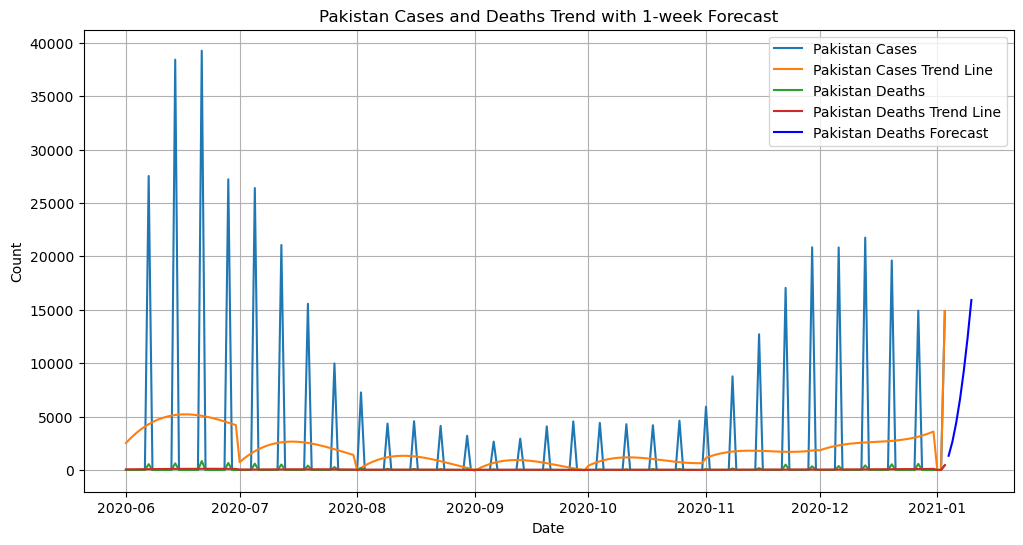

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pakistan_data = Worldcoviddata_filtered[Worldcoviddata_filtered['iso_code'] == 'PAK']

pakistan_data['date'] = pd.to_datetime(pakistan_data['date'])

pakistan_data['Day'] = pakistan_data['date'].dt.day
pakistan_data['Month'] = pakistan_data['date'].dt.month
pakistan_data['Year'] = pakistan_data['date'].dt.year

X_pakistan_cases = pakistan_data[['Day', 'Month', 'Year']]
y_pakistan_cases = pakistan_data['new_cases']
poly_features_pakistan_cases = PolynomialFeatures(degree=3)
X_poly_pakistan_cases = poly_features_pakistan_cases.fit_transform(X_pakistan_cases)
poly_model_pakistan_cases = LinearRegression().fit(X_poly_pakistan_cases, y_pakistan_cases)

X_pakistan_deaths = pakistan_data[['Day', 'Month', 'Year']]
y_pakistan_deaths = pakistan_data['new_deaths']

poly_features_pakistan_deaths = PolynomialFeatures(degree=3)
X_poly_pakistan_deaths = poly_features_pakistan_deaths.fit_transform(X_pakistan_deaths)
poly_model_pakistan_deaths = LinearRegression().fit(X_poly_pakistan_deaths, y_pakistan_deaths)

forecast_start_date = pd.to_datetime('2021-01-04')
forecast_end_date = pd.to_datetime('2021-01-10')
forecast_dates_pakistan = pd.date_range(forecast_start_date, forecast_end_date)
forecast_data_pakistan = pd.DataFrame({'Date': forecast_dates_pakistan, 'Day': forecast_dates_pakistan.day, 'Month': forecast_dates_pakistan.month, 'Year': forecast_dates_pakistan.year})
forecast_data_pakistan['Cases_Forecast'] = poly_model_pakistan_cases.predict(poly_features_pakistan_cases.transform(forecast_data_pakistan[['Day', 'Month', 'Year']]))
forecast_data_pakistan['Deaths_Forecast'] = poly_model_pakistan_deaths.predict(poly_features_pakistan_deaths.transform(forecast_data_pakistan[['Day', 'Month', 'Year']]))


plt.figure(figsize=(12, 6))
plt.plot(pakistan_data['date'], pakistan_data['new_cases'], label='Pakistan Cases')
plt.plot(pakistan_data['date'], poly_model_pakistan_cases.predict(X_poly_pakistan_cases), label='Pakistan Cases Trend Line')

plt.plot(pakistan_data['date'], pakistan_data['new_deaths'], label='Pakistan Deaths')
plt.plot(pakistan_data['date'], poly_model_pakistan_deaths.predict(X_poly_pakistan_deaths), label='Pakistan Deaths Trend Line')
plt.plot(forecast_data_pakistan['Date'], forecast_data_pakistan['Deaths_Forecast'], label='Pakistan Deaths Forecast',color='blue')

plt.title('Pakistan Cases and Deaths Trend with 1-week Forecast')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_25493/2527028282.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_25493/2527028282.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t4/5q_pyxdx5810srjx4bpz2gvr0000gn/T/ipykernel_25493/2527028282.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

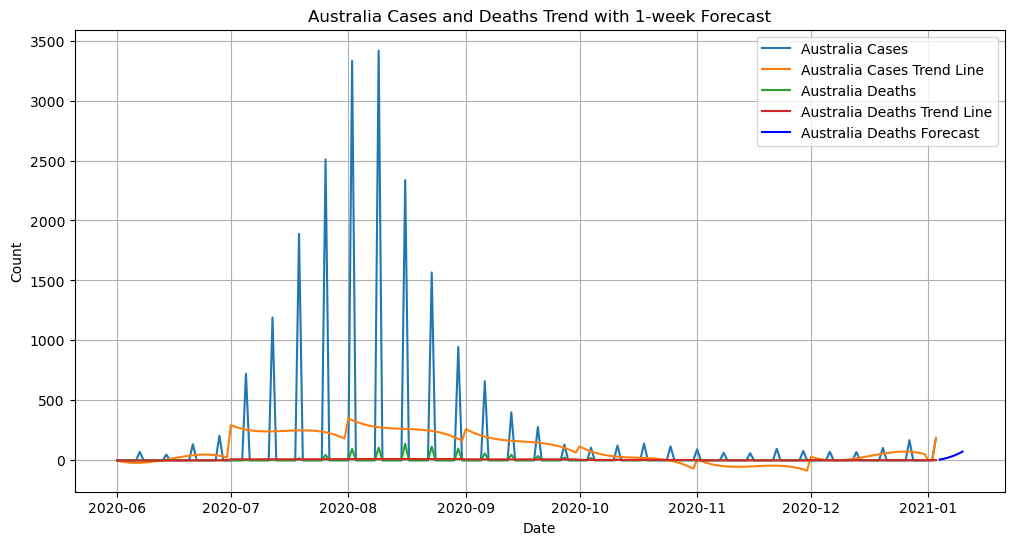

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

australia_data = Worldcoviddata_filtered[Worldcoviddata_filtered['iso_code'] == 'AUS']

australia_data['date'] = pd.to_datetime(australia_data['date'])

australia_data['Day'] = australia_data['date'].dt.day
australia_data['Month'] = australia_data['date'].dt.month
australia_data['Year'] = australia_data['date'].dt.year

X_australia_cases = australia_data[['Day', 'Month', 'Year']]
y_australia_cases = australia_data['new_cases']
poly_features_australia_cases = PolynomialFeatures(degree=3)
X_poly_australia_cases = poly_features_australia_cases.fit_transform(X_australia_cases)
poly_model_australia_cases = LinearRegression().fit(X_poly_australia_cases, y_australia_cases)

X_australia_deaths = australia_data[['Day', 'Month', 'Year']]
y_australia_deaths = australia_data['new_deaths']

poly_features_australia_deaths = PolynomialFeatures(degree=3)
X_poly_australia_deaths = poly_features_australia_deaths.fit_transform(X_australia_deaths)
poly_model_australia_deaths = LinearRegression().fit(X_poly_australia_deaths, y_australia_deaths)

forecast_start_date = pd.to_datetime('2021-01-04')
forecast_end_date = pd.to_datetime('2021-01-10')
forecast_dates_australia = pd.date_range(forecast_start_date, forecast_end_date)
forecast_data_australia = pd.DataFrame({'Date': forecast_dates_australia, 'Day': forecast_dates_australia.day, 'Month': forecast_dates_australia.month, 'Year': forecast_dates_australia.year})
forecast_data_australia['Cases_Forecast'] = poly_model_australia_cases.predict(poly_features_australia_cases.transform(forecast_data_australia[['Day', 'Month', 'Year']]))
forecast_data_australia['Deaths_Forecast'] = poly_model_australia_deaths.predict(poly_features_australia_deaths.transform(forecast_data_australia[['Day', 'Month', 'Year']]))


plt.figure(figsize=(12, 6))
plt.plot(australia_data['date'], australia_data['new_cases'], label='Australia Cases')
plt.plot(australia_data['date'], poly_model_australia_cases.predict(X_poly_australia_cases), label='Australia Cases Trend Line')
#plt.plot(forecast_data_australia['Date'], forecast_data_australia['Cases_Forecast'], label='Australia Cases Forecast', linestyle='--', marker='o', color='red')

plt.plot(australia_data['date'], australia_data['new_deaths'], label='Australia Deaths')
plt.plot(australia_data['date'], poly_model_australia_deaths.predict(X_poly_australia_deaths), label='Australia Deaths Trend Line')
plt.plot(forecast_data_australia['Date'], forecast_data_australia['Deaths_Forecast'], label='Australia Deaths Forecast',color='blue')

plt.title('Australia Cases and Deaths Trend with 1-week Forecast')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()
